<a href="https://colab.research.google.com/github/CristianDavid010/Entrega/blob/main/mejora%20en%20codigo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Precio: $18000 → Predicción de ventas: 4 unidades
R² (coeficiente de determinación): 0.97


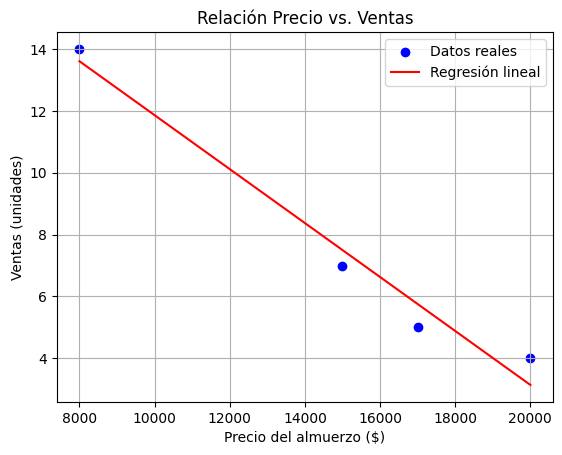

Para vender 10 unidades, el precio debería ser ~$12213


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Datos: [Precio] vs. [Ventas] (unidades vendidas)
precios = np.array([8000, 15000, 17000, 20000]).reshape(-1, 1)  # X (precio)
ventas = np.array([14, 7, 5, 4])  # y (ventas)

# --- 1. Entrenar el modelo ---
modelo = LinearRegression()
modelo.fit(precios, ventas)

# --- 2. Predicción mejorada ---
precio_a_predecir = 18000  # ¿Cuántas ventas se esperan a $18,000?
ventas_predichas = modelo.predict([[precio_a_predecir]])
print(f"Precio: ${precio_a_predecir} → Predicción de ventas: {int(ventas_predichas[0])} unidades")

# --- 3. Evaluación del modelo ---
r2 = r2_score(ventas, modelo.predict(precios))
print(f"R² (coeficiente de determinación): {r2:.2f}")  # 1.0 es perfecto

# --- 4. Visualización ---
plt.scatter(precios, ventas, color='blue', label='Datos reales')
plt.plot(precios, modelo.predict(precios), color='red', label='Regresión lineal')
plt.xlabel('Precio del almuerzo ($)')
plt.ylabel('Ventas (unidades)')
plt.title('Relación Precio vs. Ventas')
plt.legend()
plt.grid(True)
plt.show()

# --- 5. Función adicional: Predecir precio dado ventas ---
def predecir_precio(ventas_deseadas):
    # Invertimos X e y para predecir precio dado ventas
    modelo_inverso = LinearRegression()
    modelo_inverso.fit(ventas.reshape(-1, 1), precios)
    return modelo_inverso.predict([[ventas_deseadas]])[0][0]

ejemplo_ventas = 10
precio_estimado = predecir_precio(ejemplo_ventas)
print(f"Para vender {ejemplo_ventas} unidades, el precio debería ser ~${int(precio_estimado)}")